# Project: Wrangling and Analyze Data on WeRateDogs Tweets Information

## Introduction

WeRateDogs is an account Twitter where dogs are rated with a diverse, unconventional and funny comments about the dog. These ratings most often have a denominator of 10 and  the numerators most often  greater than 10, for instance we have., 11/10, 12/10, 13/10, etc., This is so because the dogs are highly rated dogs.

The WeRateDogs account has over 4 million followers and has received many international media coverage as well.

The datasets are real-world datasets and at such comes with alot of issues, I will be using Python and its libraries to gather data from a variety of sources in different sources, assess the quality and tidiness issues, and then clean it.

### Data description

### Twitter archive:

The WeRateDogs Twitter archive contains tweeted data for over 5000+ tweets. A column contains tweeted text where ratings, dog name, and dog stage (i.e., doggo, floofer, pupper, and puppo) were extracted. To enhance the data only tweets with ratings were extracted (2366).

### Image prediction: 
Every image in the WeRateDogs Twitter archive was classified into different breeds using a neural network algorithm. The results: a table full of image predictions (the top three only) alongside each tweet ID, image URL, and the image number that corresponded to the most confident prediction (numbered 1 to 4, since tweets can have up to four images).

### Additional tweet data: 
Additional tweet information is acquired from Twitter to address and bring out various insights on WeRateDog tweets, such as the number of likes and retweets, etc.

## Data Gathering

#### Importing all necessary libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import json
import re
import requests
import tweepy
from PIL import Image
from io import BytesIO

plt.style.use('fivethirtyeight')
%matplotlib inline

### Loading the twitter archive dataset

In [2]:
df= ('twitter-archive-enhanced.csv')


In [3]:
 # Data directory folder

twitter_archive = pd.read_csv(f'twitter-archive-enhanced-2.csv')

### Requesting the image prediction from Udacity server

2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
response = requests.get('https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv')

In [5]:
# saving image_prediction as a tsv file
with open('image_predictions.tsv', 'wb') as file: 
    file.write(response.content)

In [6]:
# load image_predictions.tsv file into a df
image_pred = pd.read_csv('image_predictions.tsv', sep='\t')


####  Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [ ]:
import tweepy
from tweepy import OAuthHandler
import json
from timeit import default_timer as timer

# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
# These are hidden to comply with Twitter's API terms and conditions
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

#NOTE: I had a mobile verification issue, hence i was sent these code for querying twitter API from a udacity instructor

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

In [7]:
Tweet_json=pd.read_json('tweet_json.txt', lines=True)

Tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


## Assessing Data


### Assessing Twitter archive file

In [8]:
twitter_archive.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [9]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
##Number of NA
twitter_archive.isna().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [11]:
#Descriptive analysis

twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [12]:
# Checking for wrong ratings representation of the numerator and the denominator
wrong_repr = (twitter_archive[twitter_archive['text']
                .str.contains(r'\d+\.\d+/\d+')]
                [['text', 'rating_numerator', 'rating_denominator']])
wrong_repr.head()


,text,rating_numerator,rating_denominator
45,This is Bella. She hopes her smile made you sm...,5,10
340,"RT @dog_rates: This is Logan, the Chow who liv...",75,10
695,"This is Logan, the Chow who lived. He solemnly...",75,10
763,This is Sophie. She's a Jubilant Bush Pupper. ...,27,10
1689,I've been told there's a slight possibility he...,5,10


### Observations

1. Timestamp is a string, instead of datetime object


2. Misrepresentation of NA value in different columns.


3. There are 181 non-null values in retweeted_status_user_id, retweeted_status_timestamp columns and retweeted_status_id.

4. Some ratings numerator and denominator are chosen wrongly from the text column.

### Assessing Image prediction File

In [13]:
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


### Observations

1. Inconsistent dog breed name i.e., uppercase and lowercase

2. Names are separated with "_" instead of " "

In [15]:
#Descriptive analysis
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### Assessing Twitter Additional Data

In [16]:
Tweet_json.head()

,contributors,coordinates,created_at,display_text_range,entities,extended_entities,favorite_count,favorited,full_text,geo,...,possibly_sensitive_appealable,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,retweeted_status,source,truncated,user
0,NaN,NaN,2017-08-01 16:23:56,"[0, 85]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892420639486877696, 'id_str'...",39467,False,This is Phineas. He's a mystical boy. Only eve...,NaN,...,0.0,NaN,NaN,NaN,8853,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
1,NaN,NaN,2017-08-01 00:17:27,"[0, 138]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 892177413194625024, 'id_str'...",33819,False,This is Tilly. She's just checking pup on you....,NaN,...,0.0,NaN,NaN,NaN,6514,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
2,NaN,NaN,2017-07-31 00:18:03,"[0, 121]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891815175371796480, 'id_str'...",25461,False,This is Archie. He is a rare Norwegian Pouncin...,NaN,...,0.0,NaN,NaN,NaN,4328,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
3,NaN,NaN,2017-07-30 15:58:51,"[0, 79]","{'hashtags': [], 'symbols': [], 'user_mentions...","{'media': [{'id': 891689552724799489, 'id_str'...",42908,False,This is Darla. She commenced a snooze mid meal...,NaN,...,0.0,NaN,NaN,NaN,8964,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."
4,NaN,NaN,2017-07-29 16:00:24,"[0, 138]","{'hashtags': [{'text': 'BarkWeek', 'indices': ...","{'media': [{'id': 891327551943041024, 'id_str'...",41048,False,This is Franklin. He would like you to stop ca...,NaN,...,0.0,NaN,NaN,NaN,9774,False,NaN,"<a href=""http://twitter.com/download/iphone"" r...",False,"{'id': 4196983835, 'id_str': '4196983835', 'na..."


In [17]:
Tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 31 columns):
contributors                     0 non-null float64
coordinates                      0 non-null float64
created_at                       2354 non-null datetime64[ns]
display_text_range               2354 non-null object
entities                         2354 non-null object
extended_entities                2073 non-null object
favorite_count                   2354 non-null int64
favorited                        2354 non-null bool
full_text                        2354 non-null object
geo                              0 non-null float64
id                               2354 non-null int64
id_str                           2354 non-null int64
in_reply_to_screen_name          78 non-null object
in_reply_to_status_id            78 non-null float64
in_reply_to_status_id_str        78 non-null float64
in_reply_to_user_id              78 non-null float64
in_reply_to_user_id_str          78 n

In [17]:
Tweet_json.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,79515.000000


#### Observations

### Quality issues
1. Only best image prediction is reuqired on image prediction data

2. Unnecessary retweets columns and replies.

3.Date in the tweet text was chosen to be ratings Date in the tweet text was chosen to be ratings

4. Improper representation of NA values in columns such as Doggo, Floofer,etc on the twitter archive table

5. Erroneous data type was also detected on the Image prediction table.


6. Retweet columns and replies are no longer needed

7. Invalid ratings representation i.e., some ratings are wrongly represented e.g., 5/10 instead of 13.5/10

8. Redundant urls in a source column

### Tidiness issues
1.  There are 2 variables in Timestamp column

2.  Dog stages requires only one column

## Cleaning Data
In this section, we will clean **all** of the issues that has been documented while assessing. 


In [18]:
# For easy comparism, make a copy of each dataset
twitter_archive_clean = twitter_archive.copy()
tweets_clean = Tweet_json.copy()
image_pred_clean = image_pred.copy()

In [19]:
# checking for duplicates
twitter_archive.tweet_id.duplicated().any()

False

In [20]:
Tweet_json.id.duplicated().any()

False

### Tidiness Issue #1: There are 2 variables in Timestamp column.

#### Define; We will need to extract both time and date from the timestamp object and delete the timestamp column after extraction.

#### Code

In [21]:
twitter_archive_clean['date'] = pd.to_datetime(twitter_archive_clean['timestamp'])
twitter_archive_clean['time'] = twitter_archive_clean['timestamp']

# Removing timestamp from the dataframe
twitter_archive_clean.drop(columns=['timestamp'], inplace=True)

#### Test

In [22]:
twitter_archive_clean.head(2)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01 16:23:56,2017-08-01 16:23:56 +0000
1,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01 00:17:27,2017-08-01 00:17:27 +0000


### Tidiness issue #2:  Dog stages requires only one column

#### Define: The dog stage is one variable and should form a single column, but it is spread across 4 columns.


#### Code

In [23]:
dog_stage = twitter_archive_clean.melt(id_vars= ['tweet_id'],
                value_vars=('doggo', 'floofer', 'pupper', 'puppo'),
                    var_name='dogs_col', value_name='dog_stage')

dog_stage = dog_stage[~dog_stage['dog_stage'].isna()].drop('dogs_col', axis=1)

twitter_archive_clean = pd.merge(twitter_archive_clean, dog_stage, on='tweet_id', how='left')

# dog_stage is no longer
del dog_stage 

In [24]:
twitter_archive_clean['dog_stage'] = twitter_archive_clean['dog_stage'].astype('category')


### Test:

In [25]:
# All columns in the dataframe
twitter_archive_clean.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'source',
       'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'date', 'time', 'dog_stage'],
      dtype='object')

In [26]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,dog_stage
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01 16:23:56,2017-08-01 16:23:56 +0000,None
1,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01 16:23:56,2017-08-01 16:23:56 +0000,None
2,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01 16:23:56,2017-08-01 16:23:56 +0000,None
3,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01 16:23:56,2017-08-01 16:23:56 +0000,None
4,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01 00:17:27,2017-08-01 00:17:27 +0000,None


In [27]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9424 entries, 0 to 9423
Data columns (total 19 columns):
tweet_id                      9424 non-null int64
in_reply_to_status_id         312 non-null float64
in_reply_to_user_id           312 non-null float64
source                        9424 non-null object
text                          9424 non-null object
retweeted_status_id           724 non-null float64
retweeted_status_user_id      724 non-null float64
retweeted_status_timestamp    724 non-null object
expanded_urls                 9188 non-null object
rating_numerator              9424 non-null int64
rating_denominator            9424 non-null int64
name                          9424 non-null object
doggo                         9424 non-null object
floofer                       9424 non-null object
pupper                        9424 non-null object
puppo                         9424 non-null object
date                          9424 non-null datetime64[ns]
time                  

## Cleaning Quality Issues

### Q Issue #1: Only Best image  is required on image_prediction data

#### Define: The best image prediction for the images in the tweets will be taken.

#### Code

In [28]:
def best_prediction(tweet_image):
    """
        This function will return the best image prediction breed
    """
    pred = None
    if (tweet_image['p1_conf']>= tweet_image['p2_conf'] 
             and
        tweet_image['p1_conf'] >= tweet_image['p3_conf']):
        pred = tweet_image['p1']
    elif tweet_image['p2_conf'] > tweet_image['p3_conf']:
        pred = tweet_image['p2']
    else:
        pred = tweet_image['p3']
    return pred


In [30]:
image_pred_clean['dog_breed'] = image_pred_clean.apply(best_prediction, axis=1)


In [31]:
image_pred_clean = image_pred_clean[['tweet_id','dog_breed', 'jpg_url']]

#### Test

In [33]:
image_pred_clean.head(3)

,tweet_id,dog_breed,jpg_url
0,666020888022790149,Welsh_springer_spaniel,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg
1,666029285002620928,redbone,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg
2,666033412701032449,German_shepherd,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg


In [34]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id     2075 non-null int64
dog_breed    2075 non-null object
jpg_url      2075 non-null object
dtypes: int64(1), object(2)
memory usage: 48.7+ KB


In [35]:
image_pred_clean.describe()

,tweet_id
count,2.075000e+03
mean,7.384514e+17
std,6.785203e+16
min,6.660209e+17
25%,6.764835e+17
50%,7.119988e+17
75%,7.932034e+17
max,8.924206e+17


## Q Issue 2: Unnecessary Retweets and replies.

#### Define:  Remove unnecessary retweets and replies.

### Code:

In [36]:
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['retweeted_status_id'].isna()]
twitter_archive_clean = twitter_archive_clean[twitter_archive_clean['in_reply_to_user_id'].isna()]

### Test:

In [37]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8388 entries, 0 to 9423
Data columns (total 19 columns):
tweet_id                      8388 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
source                        8388 non-null object
text                          8388 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 8376 non-null object
rating_numerator              8388 non-null int64
rating_denominator            8388 non-null int64
name                          8388 non-null object
doggo                         8388 non-null object
floofer                       8388 non-null object
pupper                        8388 non-null object
puppo                         8388 non-null object
date                          8388 non-null datetime64[ns]
time                          83

In [119]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,dog_stage
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01 16:23:56,2017-08-01 16:23:56 +0000,None
1,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01 16:23:56,2017-08-01 16:23:56 +0000,None
2,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01 16:23:56,2017-08-01 16:23:56 +0000,None
3,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,2017-08-01 16:23:56,2017-08-01 16:23:56 +0000,None
4,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,2017-08-01 00:17:27,2017-08-01 00:17:27 +0000,None


### Q Issue 3: Date in the tweet text was chosen to be ratings

#### Define:  Extract both ratings numerator and denominator from the text column. without extracting date as ratings! And use astype() method to change their type from str to float

### Code:

In [38]:
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean['text'].str.extract(r'([1-9][0-9]*(?:\.\d+)?)/([1-9][0-9]*)(?!/)', expand=True)

In [39]:
twitter_archive_clean[['rating_numerator', 'rating_denominator']] = twitter_archive_clean[['rating_numerator', 'rating_denominator']].astype(float)

### Test:

In [40]:
twitter_archive_clean.head(2)


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,dog_stage
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,2017-08-01 16:23:56,2017-08-01 16:23:56 +0000,None
1,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,None,None,None,None,2017-08-01 16:23:56,2017-08-01 16:23:56 +0000,None


### Q Issue #4: Improper representation of NA values in columns such as Doggo, Floofer,etc on the twitter archive table

### Define: Using the df.replace() function to replace all the "None" strings in the dog_stages columns

### Code:

In [41]:
twitter_archive_clean.loc[:, "doggo":'puppo'] = twitter_archive_clean.loc[:, "doggo":'puppo'].replace({'None': np.nan})

### Test

In [42]:
twitter_archive_clean.loc[:5, "doggo":'puppo']

,doggo,floofer,pupper,puppo
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN


In [43]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8388 entries, 0 to 9423
Data columns (total 19 columns):
tweet_id                      8388 non-null int64
in_reply_to_status_id         0 non-null float64
in_reply_to_user_id           0 non-null float64
source                        8388 non-null object
text                          8388 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 8376 non-null object
rating_numerator              8384 non-null float64
rating_denominator            8384 non-null float64
name                          8388 non-null object
doggo                         332 non-null object
floofer                       40 non-null object
pupper                        920 non-null object
puppo                         96 non-null object
date                          8388 non-null datetime64[ns]
time                          8388

In [44]:
twitter_archive_clean.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,date,time,dog_stage
0,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,2017-08-01 16:23:56,2017-08-01 16:23:56 +0000,None
1,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,2017-08-01 16:23:56,2017-08-01 16:23:56 +0000,None
2,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,2017-08-01 16:23:56,2017-08-01 16:23:56 +0000,None
3,892420643555336193,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13.0,10.0,Phineas,NaN,NaN,NaN,NaN,2017-08-01 16:23:56,2017-08-01 16:23:56 +0000,None
4,892177421306343426,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13.0,10.0,Tilly,NaN,NaN,NaN,NaN,2017-08-01 00:17:27,2017-08-01 00:17:27 +0000,None


### Q Issue 5:  Erroneous data type was also detected on the Image prediction table (tweet_id).

#### Define: Change the datatype of tweet_id column in image prediction

### Code:

In [45]:
image_pred_clean['tweet_id'] = image_pred_clean['tweet_id'].astype(str)

### Test:

In [46]:
image_pred_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 3 columns):
tweet_id     2075 non-null object
dog_breed    2075 non-null object
jpg_url      2075 non-null object
dtypes: object(3)
memory usage: 48.7+ KB


### Q Issue 6: Retweet columns and replies are no longer needed

#### Define: Drop all retweet and replies columns using the drop() method.

### Code:

In [47]:
colto_drop = (i for i in twitter_archive_clean.columns if re.search(r'retweet.*|in_reply.*', i))
twitter_archive_clean.drop(columns=colto_drop, inplace=True)

### Test:

In [48]:
twitter_archive_clean.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'date', 'time', 'dog_stage'],
      dtype='object')

In [49]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8388 entries, 0 to 9423
Data columns (total 14 columns):
tweet_id              8388 non-null int64
source                8388 non-null object
text                  8388 non-null object
expanded_urls         8376 non-null object
rating_numerator      8384 non-null float64
rating_denominator    8384 non-null float64
name                  8388 non-null object
doggo                 332 non-null object
floofer               40 non-null object
pupper                920 non-null object
puppo                 96 non-null object
date                  8388 non-null datetime64[ns]
time                  8388 non-null object
dog_stage             8388 non-null category
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(9)
memory usage: 1.2+ MB


### Q Issue 7: Incorrectly inputed Dog names

#### Define:
The Name column has inaccurate dog names, some names are were wrongly imputed



#### Code

In [50]:
#Remove all dogs name with lower case and replace all "None" with np.nan in the dataframe
twitter_archive_clean = twitter_archive_clean[~twitter_archive_clean.name.str.islower()]

twitter_archive_clean.replace({"None": np.nan}, inplace=True)

#### Test

In [51]:
twitter_archive_clean.name.value_counts()

Lucy         44
Charlie      44
Cooper       40
Oliver       40
Penny        36
Tucker       36
Lola         32
Sadie        32
Winston      32
Daisy        28
Toby         28
Jax          24
Oscar        24
Koda         24
Bella        24
Stanley      24
Bo           24
Bailey       24
Scout        20
Milo         20
Louis        20
Rusty        20
Chester      20
Leo          20
Bentley      20
Dave         20
Buddy        20
Jerry        16
Archie       16
George       16
             ..
Stormy        4
Dutch         4
Hanz          4
Lorelei       4
Howie         4
Genevieve     4
Socks         4
Jackie        4
Stark         4
Napolean      4
Lilli         4
Clarq         4
Vixen         4
Georgie       4
Kota          4
Rufio         4
Trip          4
Arlo          4
Bloop         4
Pippin        4
Noah          4
Mya           4
Rilo          4
Bones         4
Tommy         4
Fletcher      4
Petrick       4
Derby         4
Alexander     4
Keet          4
Name: name, Length: 929,

### Q Issue 8: Redundant urls in a source column

### Define:
Use regular expression pattern to extract the text in between the \ tag

### Code

In [52]:
twitter_archive_clean['source'] = twitter_archive_clean['source'].str.extract(r'<a.*>(.*)</a>')

### Test

In [53]:
twitter_archive_clean['source'].head()

0    Twitter for iPhone
1    Twitter for iPhone
2    Twitter for iPhone
3    Twitter for iPhone
4    Twitter for iPhone
Name: source, dtype: object

In [54]:
twitter_archive_clean['rating_numerator'].value_counts()

12.00      1884
10.00      1652
11.00      1588
13.00      1120
9.00        556
8.00        364
7.00        184
14.00       136
5.00        128
6.00        120
3.00         72
4.00         52
2.00         28
1.00         16
88.00         4
420.00        4
50.00         4
84.00         4
13.50         4
165.00        4
99.00         4
24.00         4
45.00         4
144.00        4
121.00        4
11.27         4
11.26         4
80.00         4
44.00         4
9.75          4
1776.00       4
Name: rating_numerator, dtype: int64

In [55]:
twitter_archive_clean['rating_denominator'].value_counts()

10.0     7912
50.0        8
80.0        8
11.0        8
70.0        4
110.0       4
150.0       4
90.0        4
120.0       4
40.0        4
20.0        4
7.0         4
Name: rating_denominator, dtype: int64

In [56]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7972 entries, 0 to 9423
Data columns (total 14 columns):
tweet_id              7972 non-null int64
source                7972 non-null object
text                  7972 non-null object
expanded_urls         7960 non-null object
rating_numerator      7968 non-null float64
rating_denominator    7968 non-null float64
name                  5560 non-null object
doggo                 320 non-null object
floofer               40 non-null object
pupper                872 non-null object
puppo                 96 non-null object
date                  7972 non-null datetime64[ns]
time                  7972 non-null object
dog_stage             332 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(10)
memory usage: 934.2+ KB


## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [57]:
# gathering all assesed and cleaned datasets
df_clean=(twitter_archive_clean, image_pred_clean, Tweet_json);sort=True

result= pd.concat(df_clean)

print(result)


      contributors  coordinates          created_at                date  \
0              NaN          NaN                 NaT 2017-08-01 16:23:56   
1              NaN          NaN                 NaT 2017-08-01 16:23:56   
2              NaN          NaN                 NaT 2017-08-01 16:23:56   
3              NaN          NaN                 NaT 2017-08-01 16:23:56   
4              NaN          NaN                 NaT 2017-08-01 00:17:27   
5              NaN          NaN                 NaT 2017-08-01 00:17:27   
6              NaN          NaN                 NaT 2017-08-01 00:17:27   
7              NaN          NaN                 NaT 2017-08-01 00:17:27   
8              NaN          NaN                 NaT 2017-07-31 00:18:03   
9              NaN          NaN                 NaT 2017-07-31 00:18:03   
10             NaN          NaN                 NaT 2017-07-31 00:18:03   
11             NaN          NaN                 NaT 2017-07-31 00:18:03   
12             NaN       

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:4: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  after removing the cwd from sys.path.


In [58]:
result.to_csv(f'twitter_archive_master.csv', sep=',', na_rep='', float_format=None, columns=None, header=True, index=True, index_label=None, mode='w', encoding=None, quoting=None, quotechar='"', chunksize=None, date_format=None, doublequote=True, escapechar=None, decimal='.')

## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [59]:
viz_data =result

In [59]:
viz_data.head()

,contributors,coordinates,created_at,date,display_text_range,dog_stage,doggo,entities,expanded_urls,extended_entities,...,rating_numerator,retweet_count,retweeted,retweeted_status,source,text,time,truncated,tweet_id,user
0,NaN,NaN,NaT,2017-08-01 16:23:56,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,NaN,...,13.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56 +0000,NaN,892420643555336193,NaN
1,NaN,NaN,NaT,2017-08-01 16:23:56,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,NaN,...,13.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56 +0000,NaN,892420643555336193,NaN
2,NaN,NaN,NaT,2017-08-01 16:23:56,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,NaN,...,13.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56 +0000,NaN,892420643555336193,NaN
3,NaN,NaN,NaT,2017-08-01 16:23:56,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,NaN,...,13.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56 +0000,NaN,892420643555336193,NaN
4,NaN,NaN,NaT,2017-08-01 00:17:27,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,NaN,...,13.0,NaN,NaN,NaN,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27 +0000,NaN,892177421306343426,NaN


In [60]:
viz_data.describe()

,contributors,coordinates,favorite_count,geo,id,id_str,in_reply_to_status_id,in_reply_to_status_id_str,in_reply_to_user_id,in_reply_to_user_id_str,possibly_sensitive,possibly_sensitive_appealable,quoted_status_id,quoted_status_id_str,rating_denominator,rating_numerator,retweet_count
count,0.0,0.0,2354.000000,0.0,2.354000e+03,2.354000e+03,7.800000e+01,7.800000e+01,7.800000e+01,7.800000e+01,2211.0,2211.0,2.900000e+01,2.900000e+01,7968.000000,7968.000000,2354.000000
mean,NaN,NaN,8080.968564,NaN,7.426978e+17,7.426978e+17,7.455079e+17,7.455079e+17,2.014171e+16,2.014171e+16,0.0,0.0,8.162686e+17,8.162686e+17,10.376004,12.156516,3164.797366
std,NaN,NaN,11814.771334,NaN,6.852812e+16,6.852812e+16,7.582492e+16,7.582492e+16,1.252797e+17,1.252797e+17,0.0,0.0,6.164161e+16,6.164161e+16,5.731509,41.134480,5284.770364
min,NaN,NaN,0.000000,NaN,6.660209e+17,6.660209e+17,6.658147e+17,6.658147e+17,1.185634e+07,1.185634e+07,0.0,0.0,6.721083e+17,6.721083e+17,7.000000,1.000000,0.000000
25%,NaN,NaN,1415.000000,NaN,6.783975e+17,6.783975e+17,6.757419e+17,6.757419e+17,3.086374e+08,3.086374e+08,0.0,0.0,7.888183e+17,7.888183e+17,10.000000,10.000000,624.500000
50%,NaN,NaN,3603.500000,NaN,7.194596e+17,7.194596e+17,7.038708e+17,7.038708e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.340867e+17,8.340867e+17,10.000000,11.000000,1473.500000
75%,NaN,NaN,10122.250000,NaN,7.993058e+17,7.993058e+17,8.257804e+17,8.257804e+17,4.196984e+09,4.196984e+09,0.0,0.0,8.664587e+17,8.664587e+17,10.000000,12.000000,3652.000000
max,NaN,NaN,132810.000000,NaN,8.924206e+17,8.924206e+17,8.862664e+17,8.862664e+17,8.405479e+17,8.405479e+17,0.0,0.0,8.860534e+17,8.860534e+17,150.000000,1776.000000,79515.000000


### Visualization

## Most Popular dog breed

In [61]:
# dog retweet count 
dog_breed_count = (viz_data['dog_breed'].value_counts())


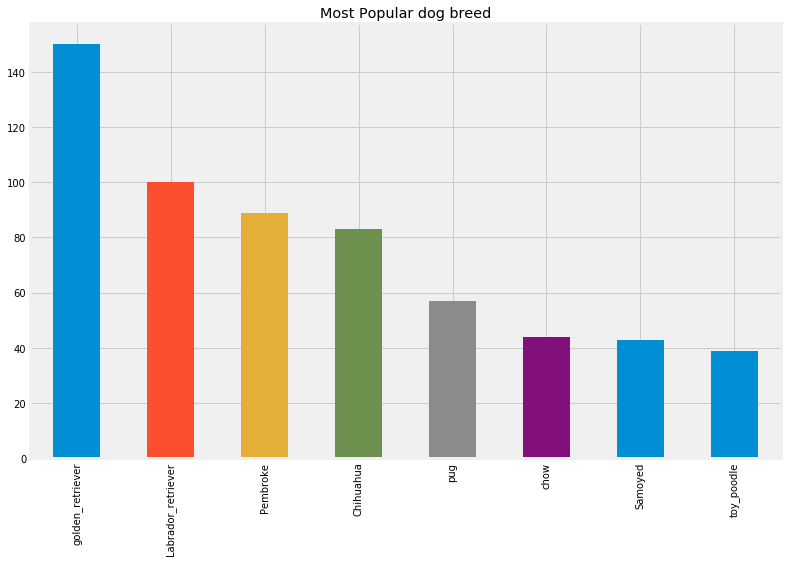

In [75]:
dog_breed_count.head(8).plot.bar(figsize=(12, 8),
  title="Most Popular dog breed");


### Most Favorite dog count

In [64]:
Favourite_dog_count = (viz_data['favorite_count'].value_counts())


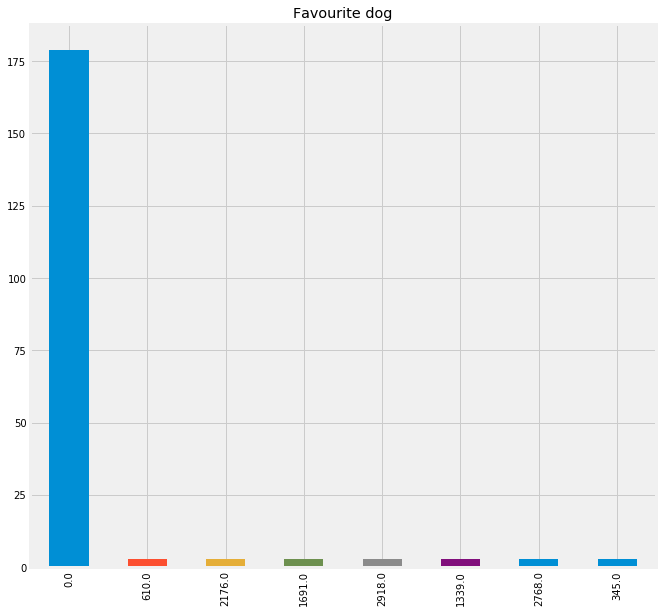

In [83]:
Favourite_dog_count.head(8).plot.bar(figsize=(10, 10), 
    title="Favourite dog");

### 25 uncommon dog breed

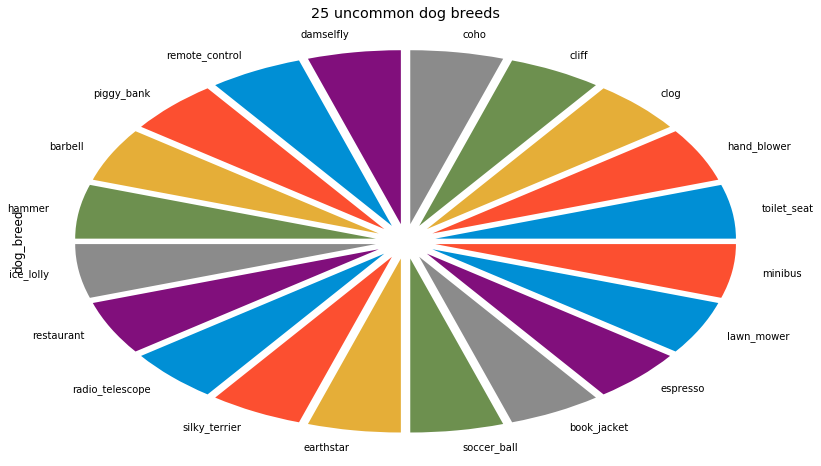

In [69]:
dog_breed_count.tail(20).plot.pie(
    explode=[0.1]*20,
    wedgeprops = {'linewidth': 2},
    figsize=(12, 8), 
    title="25 uncommon dog breeds",);

In [70]:
dog_highest_likes = viz_data.nlargest(2000, columns='date')

dog_highest_likes

,contributors,coordinates,created_at,date,display_text_range,dog_breed,dog_stage,doggo,entities,expanded_urls,...,rating_numerator,retweet_count,retweeted,retweeted_status,source,text,time,truncated,tweet_id,user
0,NaN,NaN,NaT,2017-08-01 16:23:56,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,13.0,NaN,NaN,NaN,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56 +0000,NaN,892420643555336193,NaN
1,NaN,NaN,NaT,2017-08-01 16:23:56,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,13.0,NaN,NaN,NaN,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56 +0000,NaN,892420643555336193,NaN
2,NaN,NaN,NaT,2017-08-01 16:23:56,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,13.0,NaN,NaN,NaN,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56 +0000,NaN,892420643555336193,NaN
3,NaN,NaN,NaT,2017-08-01 16:23:56,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,13.0,NaN,NaN,NaN,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,2017-08-01 16:23:56 +0000,NaN,892420643555336193,NaN
4,NaN,NaN,NaT,2017-08-01 00:17:27,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,13.0,NaN,NaN,NaN,Twitter for iPhone,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27 +0000,NaN,892177421306343426,NaN
5,NaN,NaN,NaT,2017-08-01 00:17:27,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,13.0,NaN,NaN,NaN,Twitter for iPhone,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27 +0000,NaN,892177421306343426,NaN
6,NaN,NaN,NaT,2017-08-01 00:17:27,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,13.0,NaN,NaN,NaN,Twitter for iPhone,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27 +0000,NaN,892177421306343426,NaN
7,NaN,NaN,NaT,2017-08-01 00:17:27,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,13.0,NaN,NaN,NaN,Twitter for iPhone,This is Tilly. She's just checking pup on you....,2017-08-01 00:17:27 +0000,NaN,892177421306343426,NaN
8,NaN,NaN,NaT,2017-07-31 00:18:03,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,12.0,NaN,NaN,NaN,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03 +0000,NaN,891815181378084864,NaN
9,NaN,NaN,NaT,2017-07-31 00:18:03,NaN,NaN,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,12.0,NaN,NaN,NaN,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,2017-07-31 00:18:03 +0000,NaN,891815181378084864,NaN


#### Correlation between retweets and like 

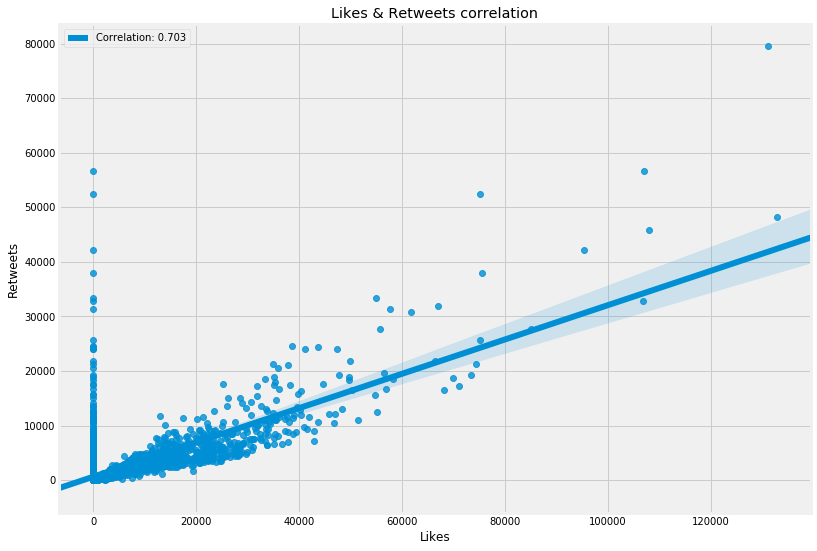

In [71]:
fig, ax = plt.subplots(figsize=(12, 9))
retw_like_cor = viz_data.corr().loc['favorite_count', 'retweet_count'] # Correlation
sns.regplot(x=viz_data['favorite_count'], y=viz_data['retweet_count'], ax=ax)
ax.set_xlabel('Likes', fontsize=12)
ax.set_ylabel('Retweets', fontsize=12)
ax.set_title('Likes & Retweets correlation')
ax.legend([(f"Correlation: {retw_like_cor:.3f}")]);

#### Insight:

1. The above diagram shows the dog breeds who are rarely tweeted.

2. The 25 dogs breed have the same interval i.e., posted only once.

3. Golden retriever dogs breed are the most tweeted dog as shown in the first graph above.

4. Among the dogs on WeRateDogs timeline, Cooper, Oliver, Tucker, Charlie and Sadie are the most popular names of dogs

5. After examining the relationship between retweets and likes,we can say that there is 91% correlation between retweet count and tweet likes.